In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

# Streaming analysis

In this notebook, I will 

1. implement a streaming computation of variance
2. implement a streaming linear regression
3. Compate the differences in computation and mempry between streaming and non-streaming linear regression

we'll do variance and regression, so let's use the awesome sklearn.make_regression to create a Dataset:

In [2]:
X,y = make_regression(n_samples=100, 
                      n_features=1, 
                      n_informative=1, 
                      n_targets=1, 
                      tail_strength=0.5, noise=10.0)

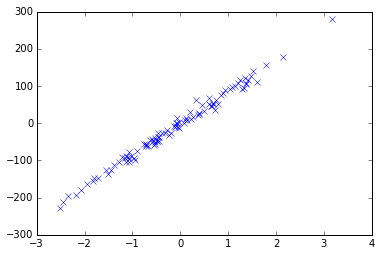

In [3]:
plt.plot(X,y,'x')


# Streaming Variance

Really simple

In [4]:
def mu(x,x_old,N_old,S_old,t=1):
    x_new = x_old + (1/(N_old+1) *((x*t)-x_old))
    S = S_old +(x-x_new)*(x-x_new)
    n_new = N_old+1
    return x_new,n_new,S

In [5]:
y_t = 0
y_mean = 0
y_var = 0
n= 0
n_new = 0
y_hat = 0
S = 0
for i in range(len(y)):
    y_hat,n_new,S = mu(y[i],y_hat,n_new,S)

In [6]:
np.mean(y),np.var(y)

(-12.019790503611391, 8712.0891313189004)

In [7]:
y_hat, S/(n_new-1)

(-12.019790503611398, 8474.3215583757774)

# streaming regression

In [8]:
X = np.append(np.atleast_2d(np.ones(shape=X.shape[0])).T,X,axis=1)


In [9]:
def regr(x,y,A,b):
    A = A+x*x
    b = b + x*y
    return A,b

In [10]:
A = 0
b = 0

for i in range(len(y)):
    A,b = regr(X[i],y[i],A,b)

In [11]:
beta = 1/A *b
beta

array([-12.0197905 ,  85.00185438])

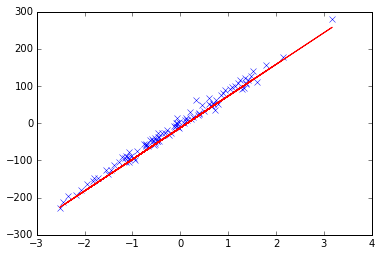

In [12]:
plt.plot(X[:,1],y,'x',color= 'b')
plt.plot(X[:,1],beta[0]+X[:,1]*beta[1],'r')

# comparisson

non streaming linear regression needs to safe all examples in X at once; otherwise e.g. OLS ($\hat\beta = (X^T X)^{-1}X^T y$) won't work. No need fot that in streaming linear regression. We can just work with new entries as they come along and only have to safe A and b. 
On the computational side, standard ols regression is $O(C^2N)$ with N training examples and C features (note that there are more training examples than features, otherwise there's no single solution to the OLS). Online regression has a similar/ a bit higher complexity (this is an estimate. At each example, we have $x*x$ which amounts to ~ $C^2$ and $x*y$ which adds CN); however, in ols regression, we need to perform those computations at one point in time, while with online regression, it can be streched over several occasions. Additionally, the outcomes of streaming regressions are useable right from the start, which can be interesting of e.g. the choice of a data generating action depends on the outcomes (see contextual bandits).

This is, unsurprisingly, great for online problems, in which e.g. user data comes in as a steady stream but would be infeasible if it had to be saved and computed at one go.